In [2]:
#run this at beginning to ensure we're using correct kernel (env) and avoid missing modules
!conda list seaborn

# packages in environment at C:\Users\WS\Miniconda3\envs\ml:
#
# Name                    Version                   Build  Channel
seaborn                   0.11.1             pyhd3eb1b0_0  


### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../data/heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No missing data, no need to drop or impute.
All data are numerical, no need to transform.

In [5]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#see how many positive(1) and negative (0) samples in our data
df.value_counts('target')

target
1    165
0    138
dtype: int64

In [8]:
#by ratio
df.value_counts('target', normalize=True)

target
1    0.544554
0    0.455446
dtype: float64

We can observe this is quite a balanced dataset (target numbers are almost even)

In [9]:
#let's see the breakdown by gender. Male = 1, female = 0
df.value_counts('sex')

sex
1    207
0     96
dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [16]:
sum(df[df['sex']==1]['target']==1)

93

In [25]:
#% of heart disease in sample by gender
males = sum(df['sex']==1)
pos_males = sum(df[df['sex']==1]['target']==1)
print('There are {} positive cases in males, which is {:.1f}%'.format(pos_males, pos_males/males*100))

There are 93 positive cases in males, which is 44.9%


In [28]:
#% of heart disease in sample by gender
females = sum(df['sex']==0)
pos_females = sum(df[df['sex']==0]['target']==1)
print('There are {} positive cases in females, which is {:.1f}%'.format(pos_females, pos_females/females*100))

There are 72 positive cases in females, which is 75.0%


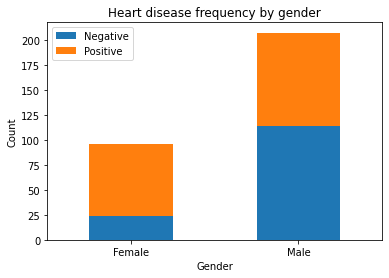

In [39]:
pd.crosstab(df.sex, df.target).plot(kind='bar', stacked=True);
plt.legend(["Negative", "Positive"]);
plt.xticks(ticks=[0,1], labels=["Female", "Male"],
           rotation=0);
plt.title("Heart disease frequency by gender");
plt.xlabel("Gender")
plt.ylabel("Count");

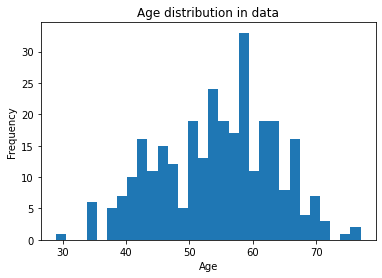

In [10]:
#now let's check the age distribution
df.age.plot.hist(bins=30);
plt.xlabel("Age");
plt.title("Age distribution in data");

Note that we do not have a lot of data for 30 -40 years or younger than 30 years - will not be very helpful in predicting for patients in that age range.

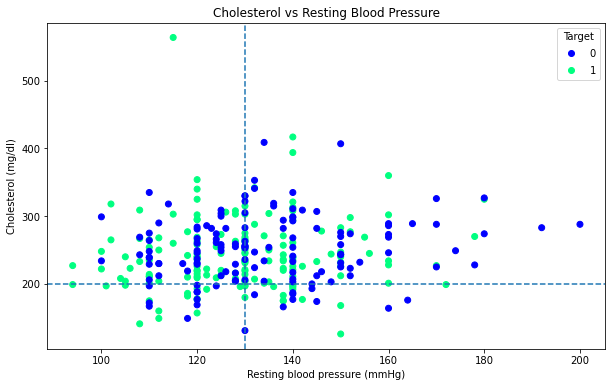

In [31]:
#let's check cholesterol vs resting blood pressure in a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df.trestbps, 
                     df.chol,
                     c=df.target,
                     cmap='winter')

ax.set(title='Cholesterol vs Resting Blood Pressure',
        xlabel='Resting blood pressure (mmHg)',
        ylabel='Cholesterol (mg/dl)');
ax.legend(*scatter.legend_elements(), title='Target');

#chol > 200 is usually cause for concern, add a line
ax.axhline(y=200, linestyle='--');

#bp > 130 is usually cause for concern, add a line
ax.axvline(x=130, linestyle='--');

Observation: most of the data points lie at above 200 cholesterol.
Also, it seems purely resting blood pressure is not a good predictor of the target, as the target is distributed on both sides of the 130mmHg threshold.

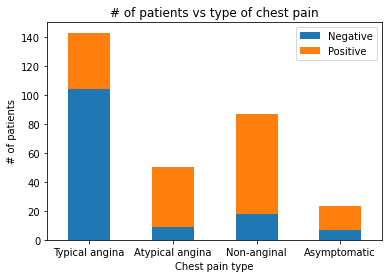

In [39]:
#now let's take a look at heart disease frequency vs the chest pain type
pd.crosstab(df.cp, df.target).plot(kind='bar', stacked=True, );
plt.legend(["Negative", "Positive"]);
plt.xticks(rotation=0,
            ticks=[0, 1, 2, 3],
            labels=['Typical angina', 'Atypical angina', 'Non-anginal', 'Asymptomatic']);
plt.xlabel('Chest pain type')
plt.ylabel('# of patients');
plt.title('# of patients vs type of chest pain');

Observation: atypical angina and non-anginal chest pain types seem to have higher percentage of positive cases.

In terms of pure number of patients, the most presented with typical angina.

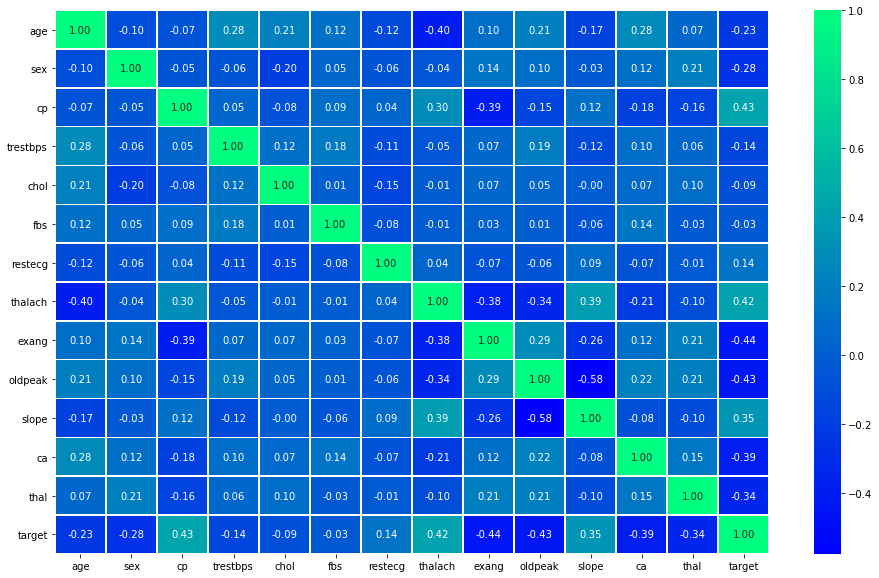

In [17]:
#now let's check the correlation between the features
corr_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt=".2f",
            cmap="winter");

Observation: 'exang' (exercise angina), cp (chest pain), and 'oldpeak' (ST depression induced by exercise relative to rest) have the highest correlation to the target variable.

## Modelling
Enough exploration for now, onward to modelling.

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.shape

(303, 14)

In [18]:
#split into train and test sets, check the shapes to ensure it's as expected
X = df.drop(columns='target')
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = df['target']
y.shape

(303,)

In [48]:
#set random seed for reproducibility
np.random.seed(42)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [50]:
X_train.shape

(257, 13)

In [51]:
y_train.shape

(257,)

In [36]:
X_test.shape

(46, 13)

In [37]:
y_test.shape

(46,)

In [32]:
#try KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train);

In [53]:
print(clf.score(X_train, y_train))

0.7509727626459144


In [54]:
print(clf.score(X_test, y_test))

0.6956521739130435


In [55]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, y_preds)

array([[12,  6],
       [ 8, 20]], dtype=int64)

Observation: accuracy with K Neighbors Classifier is too low, even on our training set it reaches only ~75% accuracy, and ~70% on the test set.

Let's try another model.